In [1]:
library(ggplot2)
library(tidyverse)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
✔ purrr   1.0.1     
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [70]:
source('~/isolines_uq/scripts/R/confidence_regions_procedure/auxiliary_scripts/distributionIsolines.R')
source('~/isolines_uq/scripts/R/confidence_regions_procedure/auxiliary_scripts/utils.R')
source('~/isolines_uq/scripts/R/confidence_regions_procedure/auxiliary_scripts/confidenceRegions.R')

rdist <- function(n) {
    dat <- data.frame(rmvt(n=n, sigma=matrix(c(1, 0.7, 0.7, 1), nrow=2), df=4))
    return(dat)
}

In [117]:
ns <- c(100000)
dist <- 'copula_tdf1_marginals_tdf1'
alphas <- c(0.05, 0.1, 0.01)
gamma <- 1/2
xi <- 1/4
pn <- function(n) { 5/n }

# number of cores for parallelization
n_cores <- 64
# number of simulations, i.e. number of bootstrap estimates of c_{1-alpha}
n_sims <- 500
# number of bootstrap replicates
B <- 1000

## Parameters for drawing isolines to check coverage
# number of coords for isoline drawing
numCoords <- 200
ub <- max(qt(1-(5/ns), df=4) + 100)
lvlset_ubs <- c(ub, ub)
lvlset_lbs <- c(0, 0)

In [118]:
orig_dat <- rdist(100000)

In [119]:
numCoords <- 200
ub <- max(qt(1-(5/ns), df=1) + 100)
lvlset_ubs <- c(ub, ub)
lvlset_lbs <- c(0, 0)
p <- 5/100000
isoline <- drawBivtIsoline(numCoords=numCoords, gridUbs=lvlset_ubs, gridLbs=lvlset_lbs, prob=p, df=4)

In [120]:
wrong_iso_X1 <- est_inv_cdf(pt(isoline[,1], df=4), orig_dat[,1], gamma)
wrong_iso_X2 <- est_inv_cdf(pt(isoline[,2], df=4), orig_dat[,2], gamma)

In [121]:
wrong_isoline <- data.frame(X1=wrong_iso_X1, X2=wrong_iso_X2)

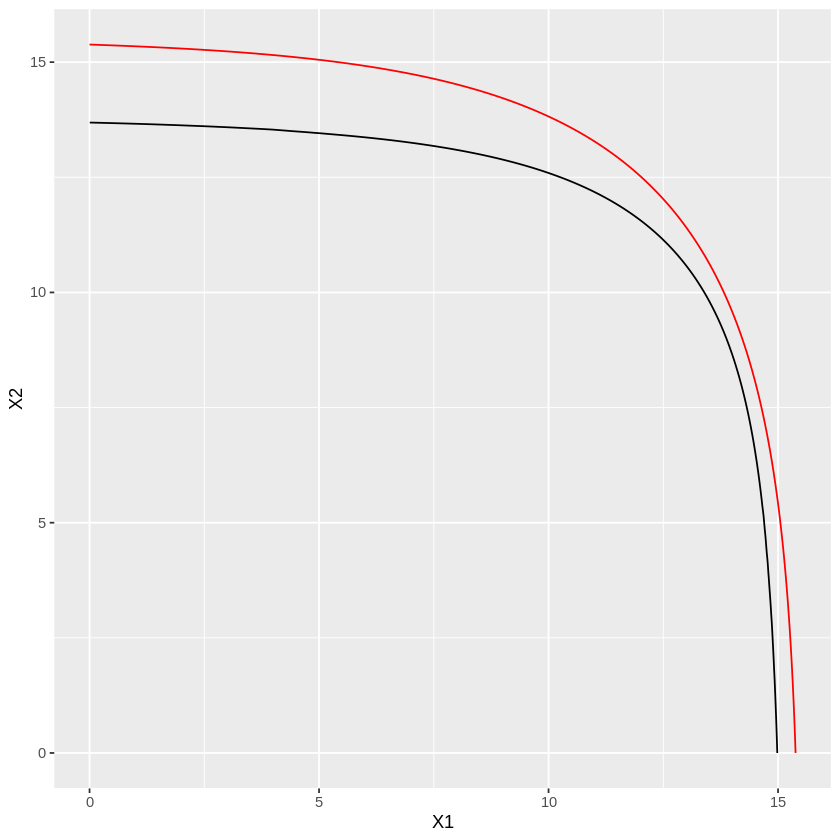

In [122]:
ggplot() + geom_line(data=isoline, aes(x=X1, y=X2), color='red') + geom_line(data=wrong_isoline, aes(x=X1, y=X2))

In [128]:
res <- readRDS('/pscratch/sd/j/jbbutler/extreme_tubes/diagnosing_undercoverage/wrong_isoline/copula_tdf1_marginals_tdf1/p5_div_n/n10000_tubes.RData')



In [132]:
res[[1]]

X1,X2
<dbl>,<dbl>
0.01874491,1.522843e-02
74.18796992,1.801141e+01
1.39980802,7.914726e-01
2.18268619,2.382950e+00
5.63129973,1.411382e+00
2.07597662,2.407155e+00
3.45037828,1.222751e+01
10.73708920,1.304494e+01
0.30089762,3.991885e-01


In [2]:
path <- '/pscratch/sd/j/jbbutler/extreme_tubes/diagnosing_undercoverage/wrong_isoline2/copula_tdf1_marginals_tdf1/p5_div_n/n10000_dataset1/tubes_10.RData'


res <- readRDS(path)